
**STEP #0: IMPORT LIBRARIES**

In [1]:
%tensorflow_version 2.x  # this line is required in notebook
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `2.x  # this line is required in notebook`. This will be interpreted as: `2.x`.


TensorFlow 2.x selected.


**STEP #1: IMPORT & EXPLORE DATASET**

In [2]:
from google.colab import files
uploaded = files.upload()

Saving weatherHistory.csv to weatherHistory.csv


In [5]:
import io
df = pd.read_csv(io.BytesIO(uploaded['weatherHistory.csv']))
# Dataset is now stored in a Pandas Dataframe

In [ ]:
# See the number of rows and columns
print("Rows, columns: " + str(df.shape))
# See the first five rows of the dataset
df.head()

# See rows with null values
#df[df.isna().any(axis=1)]

#df.loc[ [1783] , : ]

Rows, columns: (96453, 12)


,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [ ]:
df.loc[0:2,'Precip Type']

0    rain
1    rain
2    rain
Name: Precip Type, dtype: object

In [ ]:
# Missing Values
df.isna().sum()

Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64

**STEP #2: VISUALIZE DATASET**

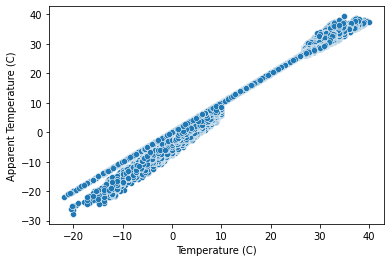

In [ ]:
sns.scatterplot(x = 'Temperature (C)', y = 'Apparent Temperature (C)', data = df)

Apparent temperature and temperature have high coorelation so apparent temperature will be droped.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd28de40fd0>,
      dtype=object)

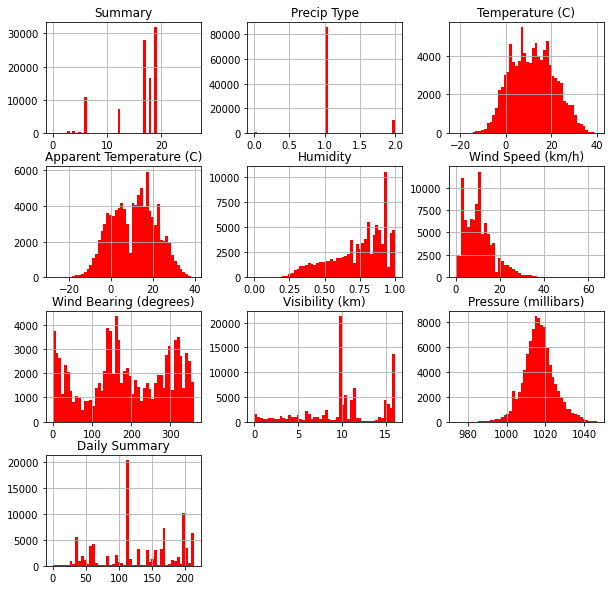

In [ ]:
df.hist(bins = 50, figsize = (10,10), color = 'r')

Some pressure values are zero, this is faulty and has to be fixed

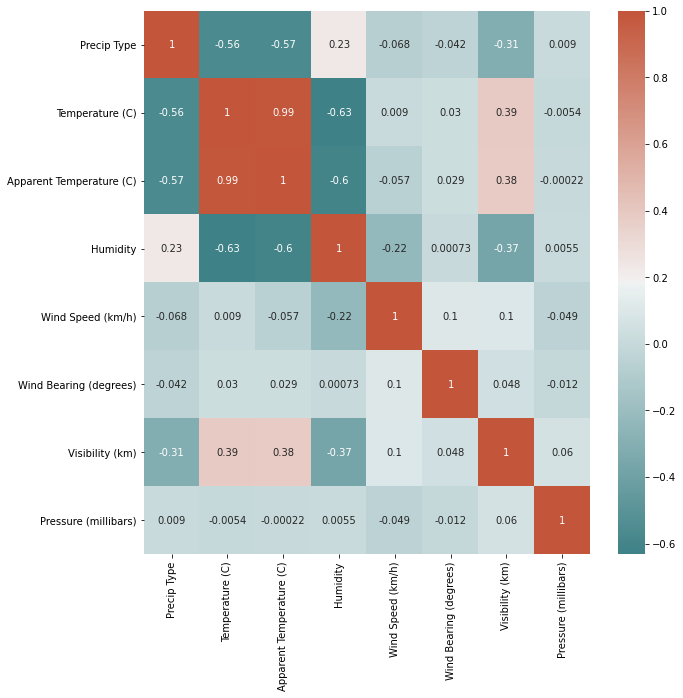

In [ ]:
corr = df.corr()
plt.subplots(figsize=(10,10))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(200, 20, as_cmap=True))

**STEP #3: DATA CLEANING**

In [6]:
#The column 'Loud Cover' consists only of zeros, we drop it
print(df['Loud Cover'].nunique())
df.drop(['Loud Cover'], axis='columns', inplace=True)

1


In [ ]:
df['Precip Type'].value_counts(dropna=False)

rain       85224
snow       10712
nothing      517
Name: Precip Type, dtype: int64

In [ ]:
df['Summary'].value_counts(dropna=False)

Partly Cloudy                          31733
Mostly Cloudy                          28094
Overcast                               16597
Clear                                  10890
Foggy                                   7148
Breezy and Overcast                      528
Breezy and Mostly Cloudy                 516
Breezy and Partly Cloudy                 386
Dry and Partly Cloudy                     86
Windy and Partly Cloudy                   67
Light Rain                                63
Breezy                                    54
Windy and Overcast                        45
Humid and Mostly Cloudy                   40
Drizzle                                   39
Windy and Mostly Cloudy                   35
Breezy and Foggy                          35
Dry                                       34
Humid and Partly Cloudy                   17
Dry and Mostly Cloudy                     14
Rain                                      10
Windy                                      8
Humid and 

In [7]:
print(df['Summary'].nunique())
print(df['Daily Summary'].nunique())

27
214


In [9]:
dummies_df=pd.get_dummies(df.Summary)

In [ ]:
merged_df=pd.concat([df,dummies_df], axis='columns')
merged_df

In [18]:
df=merged_df.drop(['Daily Summary','Summary','Breezy'], axis='columns')
df

,Formatted Date,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Breezy and Dry,Breezy and Foggy,Breezy and Mostly Cloudy,Breezy and Overcast,Breezy and Partly Cloudy,Clear,Dangerously Windy and Partly Cloudy,Drizzle,Dry,Dry and Mostly Cloudy,Dry and Partly Cloudy,Foggy,Humid and Mostly Cloudy,Humid and Overcast,Humid and Partly Cloudy,Light Rain,Mostly Cloudy,Overcast,Partly Cloudy,Rain,Windy,Windy and Dry,Windy and Foggy,Windy and Mostly Cloudy,Windy and Overcast,Windy and Partly Cloudy
0,2006-04-01 00:00:00.000 +0200,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,2006-04-01 01:00:00.000 +0200,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,2006-04-01 02:00:00.000 +0200,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,1015.94,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,2006-04-01 03:00:00.000 +0200,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,1016.41,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,2006-04-01 04:00:00.000 +0200,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,1016.51,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96448,2016-09-09 19:00:00.000 +0200,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,1014.36,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
96449,2016-09-09 20:00:00.000 +0200,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,1015.16,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
96450,2016-09-09 21:00:00.000 +0200,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,1015.66,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
96451,2016-09-09 22:00:00.000 +0200,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,1015.95,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [22]:
#Assuming the 'Precip Type' is NaN when there was no precipitation at all
def map_precip():
  df['Precip Type'].fillna('nothing', inplace=True)

map_precip()

In [23]:
#Transform categorical columns to numeric
label_encoder = LabelEncoder()
#one_hot_encoder = OneHotEncoder()


df['Precip Type'] = label_encoder.fit_transform(df["Precip Type"])
#df["Summary"] = label_encoder.fit_transform(df["Summary"])
#df["Daily Summary"] = label_encoder.fit_transform(df["Daily Summary"])
#df["Daily Summary"] = one_hot_encoder.fit_transform(df["Daily Summary"].values.reshape(-1,1)).toarray()
#(data.Country.values.reshape(-1,1)).toarray()

In [24]:
#Check
df['Precip Type'].value_counts(dropna=False)

1    85224
2    10712
0      517
Name: Precip Type, dtype: int64

In [ ]:
#Check
print(df['Precip Type'].value_counts(dropna=False))

0.0    95936
1.0      517
Name: Precip Type, dtype: int64


In [ ]:
#Check
df["Daily Summary"].value_counts(dropna=False)

0.0    96429
1.0       24
Name: Daily Summary, dtype: int64

In [ ]:
df.loc[0:20,'Daily Summary']

0     0.0
1     0.0
2     0.0
3     0.0
4     0.0
5     0.0
6     0.0
7     0.0
8     0.0
9     0.0
10    0.0
11    0.0
12    0.0
13    0.0
14    0.0
15    0.0
16    0.0
17    0.0
18    0.0
19    0.0
20    0.0
Name: Daily Summary, dtype: float64

In [ ]:
#Check again for missing values
print(df.isna().sum())

Formatted Date              0
Summary                     0
Precip Type                 0
Temperature (C)             0
Apparent Temperature (C)    0
Humidity                    0
Wind Speed (km/h)           0
Wind Bearing (degrees)      0
Visibility (km)             0
Pressure (millibars)        0
Daily Summary               0
dtype: int64


In [ ]:
#df['Precip Type'].get(key=3000)

'snow'

In [ ]:
#The 'Precip Type' is NaN when there was no precipitation at all
def map_precip2():
  df['Precip Type'].fillna(0, inplace=True)
  for i in range(len(df.index)):
    if df['Precip Type'].get(key=i) is not 0:
      df['Precip Type'] = [1 if x > 0 else 2 for x in df['Temperature (C)']]

#map_precip2()

In [ ]:
#df.index

RangeIndex(start=0, stop=96453, step=1)

In [ ]:
#df['Summary'].nunique()

In [ ]:
df['Pressure (millibars)'].astype(bool).sum(axis=0)

95165

In [25]:
#Replace the zero values of pressure with the mean value
df['Pressure (millibars)'] = df['Pressure (millibars)'].replace(0, df['Pressure (millibars)'].mean())

In [ ]:
#Check
df['Pressure (millibars)'].astype(bool).sum(axis=0)

96453

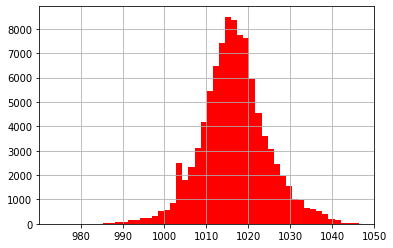

In [26]:
df['Pressure (millibars)'].hist(bins = 50,  color = 'r')

In [27]:
df["Formatted Date"] = pd.to_datetime(df["Formatted Date"], format = "%Y-%m-%d %H:%M:%S.%f %z") 

In [28]:
#Transform the date to integer values that can be used in the model
df["Year"] = df["Formatted Date"].apply(lambda x: x.year)
df["Month"] = df["Formatted Date"].apply(lambda x: x.month)
df["Day"] = df["Formatted Date"].apply(lambda x: x.day)

In [29]:
df.dtypes

Formatted Date                          object
Precip Type                              int64
Temperature (C)                        float64
Apparent Temperature (C)               float64
Humidity                               float64
Wind Speed (km/h)                      float64
Wind Bearing (degrees)                 float64
Visibility (km)                        float64
Pressure (millibars)                   float64
Breezy and Dry                           uint8
Breezy and Foggy                         uint8
Breezy and Mostly Cloudy                 uint8
Breezy and Overcast                      uint8
Breezy and Partly Cloudy                 uint8
Clear                                    uint8
Dangerously Windy and Partly Cloudy      uint8
Drizzle                                  uint8
Dry                                      uint8
Dry and Mostly Cloudy                    uint8
Dry and Partly Cloudy                    uint8
Foggy                                    uint8
Humid and Mos

**STEP #4: CREATE TESTING AND TRAINING DATASET**

In [30]:
# Separate feature variables and target variable
X = df.drop(['Apparent Temperature (C)', 'Formatted Date'], axis = 1)
y = df['Temperature (C)']

In [47]:
from sklearn.preprocessing import MinMaxScaler
X_scaled = MinMaxScaler().fit_transform(X)
Y_scaled = MinMaxScaler().fit_transform(y.values.reshape(-1,1))

In [ ]:
for i in X_scaled:
  print(i)

In [48]:
X

,Precip Type,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Breezy and Dry,Breezy and Foggy,Breezy and Mostly Cloudy,Breezy and Overcast,Breezy and Partly Cloudy,Clear,Dangerously Windy and Partly Cloudy,Drizzle,Dry,Dry and Mostly Cloudy,Dry and Partly Cloudy,Foggy,Humid and Mostly Cloudy,Humid and Overcast,Humid and Partly Cloudy,Light Rain,Mostly Cloudy,Overcast,Partly Cloudy,Rain,Windy,Windy and Dry,Windy and Foggy,Windy and Mostly Cloudy,Windy and Overcast,Windy and Partly Cloudy,Year,Month,Day
0,1,9.472222,0.89,14.1197,251.0,15.8263,1015.13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,2006,4,1
1,1,9.355556,0.86,14.2646,259.0,15.8263,1015.63,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,2006,4,1
2,1,9.377778,0.89,3.9284,204.0,14.9569,1015.94,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,2006,4,1
3,1,8.288889,0.83,14.1036,269.0,15.8263,1016.41,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,2006,4,1
4,1,8.755556,0.83,11.0446,259.0,15.8263,1016.51,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,2006,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96448,1,26.016667,0.43,10.9963,31.0,16.1000,1014.36,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,2016,9,9
96449,1,24.583333,0.48,10.0947,20.0,15.5526,1015.16,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,2016,9,9
96450,1,22.038889,0.56,8.9838,30.0,16.1000,1015.66,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,2016,9,9
96451,1,21.522222,0.60,10.5294,20.0,16.1000,1015.95,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,2016,9,9


**STEP#5: TRAINING THE MODEL**

In [109]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y_scaled, test_size = 0.25)

In [133]:
import tensorflow.keras
from keras.models import Sequential 
from keras.layers import Dense, Dropout
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.optimizers import Adagrad

model = Sequential()
model.add(Dense(16,input_dim=36, activation = 'relu'))
#model.add(Dense(16,input_dim=36, activation = 'relu', kernel_regularizer='l2'))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.4))
#model.add(Dense(64, activation='relu'))
#model.add(Dropout(0.5))
#model.add(Dense(128, activation='relu'))


model.add(Dense(1))
#model.add(Dense(1, activation = 'linear'))

In [135]:
model.compile(optimizer = Adagrad(0.01), loss = 'MSE')

In [136]:
epochs_hist=model.fit(X_train, y_train, 
                      epochs=40, batch_size = 128, 
                      validation_split = 0.2,
                      callbacks = EarlyStopping(monitor='val_loss')
                      )
#callbacks = EarlyStopping(monitor='val_loss')

Epoch 1/40
453/453 [==============================] - 1s 2ms/step - loss: 0.0993 - val_loss: 0.0119
Epoch 2/40
453/453 [==============================] - 1s 1ms/step - loss: 0.0221 - val_loss: 0.0087
Epoch 3/40
453/453 [==============================] - 1s 1ms/step - loss: 0.0160 - val_loss: 0.0067
Epoch 4/40
453/453 [==============================] - 1s 1ms/step - loss: 0.0128 - val_loss: 0.0052
Epoch 5/40
453/453 [==============================] - 1s 1ms/step - loss: 0.0106 - val_loss: 0.0043
Epoch 6/40
453/453 [==============================] - 1s 1ms/step - loss: 0.0094 - val_loss: 0.0036
Epoch 7/40
453/453 [==============================] - 1s 1ms/step - loss: 0.0083 - val_loss: 0.0032
Epoch 8/40
453/453 [==============================] - 1s 1ms/step - loss: 0.0076 - val_loss: 0.0031
Epoch 9/40
453/453 [==============================] - 1s 1ms/step - loss: 0.0071 - val_loss: 0.0028
Epoch 10/40
453/453 [==============================] - 1s 1ms/step - loss: 0.0066 - val_loss: 0.0026

**STEP#6: METRICS**

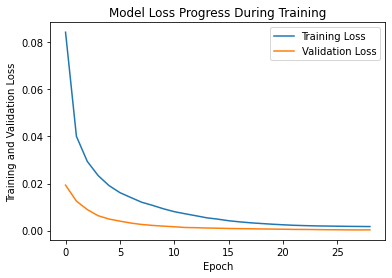

In [125]:
plt.plot(epochs_hist.history['loss'])
plt.plot(epochs_hist.history['val_loss'])
plt.title('Model Loss Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training and Validation Loss')
plt.legend(['Training Loss', 'Validation Loss'])

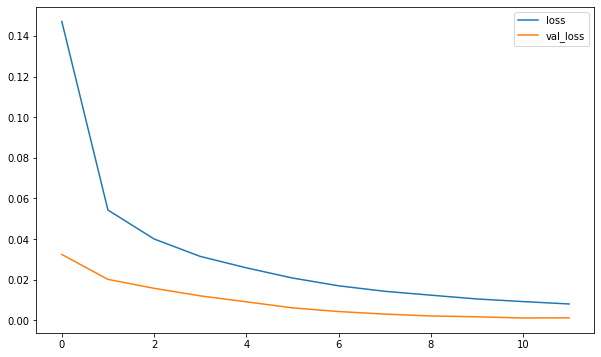

In [119]:
plt.figure(figsize=(10, 6))

plt.plot(epochs_hist.history['loss'], label='loss')
plt.plot(epochs_hist.history['val_loss'], label='val_loss')
plt.legend()

In [120]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score

def cross_val(model):
    pred = cross_val_score(model, X, y, cv=10)
    return pred.mean()

def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    print('__________________________________')
    
def evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    return mae, mse, rmse, r2_square

In [126]:
test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)

print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 0.01399815002511693
MSE: 0.00032943333043791516
RMSE: 0.018150298356718966
R2 Square 0.9861398275221528
__________________________________
Train set evaluation:
_____________________________________
MAE: 0.013937826242012088
MSE: 0.00032450951448327565
RMSE: 0.01801414762022549
R2 Square 0.9864795464762875
__________________________________
